## _*Quantum SVM*_

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler

from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute

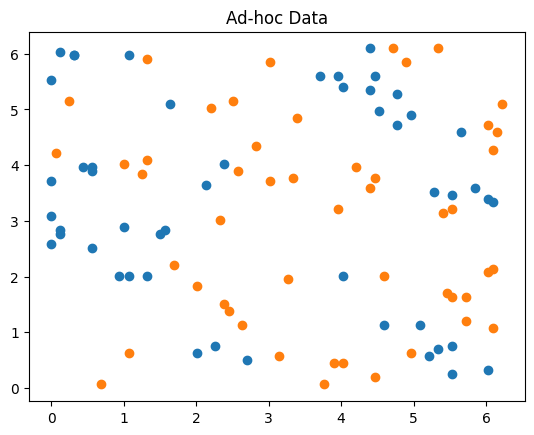

In [21]:
feature_dim = 2 # dimension of each data point
training_dataset_size = 30
testing_dataset_size = 10
random_seed = 10598
shots = 1024

train_data, train_labels, test_data, test_labels = ad_hoc_data(
    training_size=training_dataset_size,
    test_size=testing_dataset_size,
    n=feature_dim,
    gap=0.3,
    plot_data=True,
    one_hot=False
    )

In [22]:
feature_map = ZZFeatureMap(2)

fidelity = ComputeUncompute(sampler=Sampler())
new_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

qsvc = QSVC(quantum_kernel=new_kernel)

qsvc.fit(train_data, train_labels)
print(f'Training set accuracy {qsvc.score(train_data, train_labels)}; test set accuracy: {qsvc.score(test_data, test_labels)}')

Training set accuracy 1.0; test set accuracy: 1.0


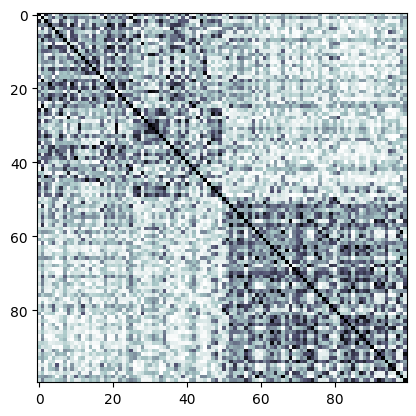

In [23]:
img = plt.imshow(qsvc.quantum_kernel.evaluate(train_data),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()